In [6]:
import pandas as pd
import numpy as np

In [3]:
!pip install xgboost

In [151]:
!pip install lightgbm

In [175]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import xgboost
import lightgbm as lgb 

In [63]:
data=pd.read_csv('smartgoat.csv',encoding='euc-kr')

In [64]:
data

,기기명,시리즈,모델,용량,제품상태,가격
0,아이폰14프로 256GB,아이폰14,프로,256GB,상,1600000
1,아이폰12 미니 64GB,아이폰12,미니,64GB,중,380000
2,아이폰12 프로 256GB,아이폰12,프로,256GB,상,690000
3,아이폰12 프로 256GB,아이폰12,프로,256GB,중,620000
4,아이폰13 프로 256GB,아이폰13,프로,256GB,상,1060000
...,...,...,...,...,...,...
3070,아이폰 13 미니 128GB,아이폰13,미니,128GB,중,335000
3071,아이폰 11 128GB,아이폰11,기본,128GB,하,275000
3072,아이폰 XS 256GB,아이폰XS,기본,256GB,하,165000
3073,아이폰 11 프로 64GB,아이폰11,프로,64GB,하,265000


## 상관계수 

In [116]:
data=data.drop('기기명',axis=1)

In [117]:
data.corr()

,시리즈,모델,용량,제품상태,가격
시리즈,1.000000,-0.436775,0.256738,0.102624,-0.429215
모델,-0.436775,1.000000,-0.118885,-0.106802,0.522478
용량,0.256738,-0.118885,1.000000,0.127429,-0.283255
제품상태,0.102624,-0.106802,0.127429,1.000000,-0.427620
가격,-0.429215,0.522478,-0.283255,-0.427620,1.000000


In [65]:
X=data.drop(['기기명','가격'],axis=1)
y=data['가격']

## Train Test 데이터 Split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [67]:
dt=DecisionTreeRegressor()

## LabelEncoding

In [68]:
le=LabelEncoder()

In [69]:
cat_col=['시리즈',	'모델',	'용량',	'제품상태']

In [70]:
le_list=[]
for cat in cat_col:
    le=LabelEncoder()
    X[cat]=le.fit_transform(X[cat])
    le_list.append(le)

In [73]:
le_list[0].classes_

array(['아이폰11', '아이폰12', '아이폰13', '아이폰14', '아이폰5S', '아이폰6', '아이폰6S',
       '아이폰7', '아이폰8', '아이폰SE', '아이폰SE2', '아이폰SE3', '아이폰X', '아이폰XR',
       '아이폰XS'], dtype=object)

## Model Fitting

In [72]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [51]:
dt.score(X_train,y_train)

0.9509266336945603

In [52]:
dt.score(X_test,y_test)

0.9333673683673136

## 다양한 모델 피팅

In [162]:
model1=DecisionTreeRegressor()
model2=RandomForestRegressor(max_depth=10)
model3=xgboost.XGBRegressor()
model4=lgb.LGBMRegressor()

In [140]:
X_train.shape, X_test.shape

((2306, 4), (769, 4))

In [141]:
y_train.shape, y_test.shape

((2306,), (769, 4))

In [190]:
models=[model1,model2,model3,model4]
rmse=[]
train=[]
test=[]

for m in models:
    m.fit(X_train,y_train)
    y_pred = m.predict(X_test)
    mse=mean_squared_error(y_test, y_pred)
    train.append(m.score(X_train,y_train))
    test.append(m.score(X_test,y_test))
    rmse.append(mse**0.5)
    print(m,m.score(X_test,y_test), )
    print('rmse=',mse**0.5)
result =pd.DataFrame([train, test, rmse])

DecisionTreeRegressor() 0.9309855287710651
rmse= 75767.18856733743
RandomForestRegressor(max_depth=10) 0.940537571851391
rmse= 70328.67088332922
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) 0.9340371140051392
rmse= 74073.16717836037
LGBMRegressor() 0.9358486083099412
rmse= 73048.9758110751


## 모델 스코어 데이터프레임으로

In [191]:
result = result.T

In [192]:
result.columns=['train_score', 'test_socre', 'rmse']


In [193]:
result

,train_score,test_socre,rmse
0,0.949876,0.930986,75767.188567
1,0.948592,0.940538,70328.670883
2,0.949857,0.934037,74073.167178
3,0.936809,0.935849,73048.975811


## 예측 시각화

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [209]:
model2.fit(X_train,y_train) # RandomForest로

RandomForestRegressor(max_depth=10)

In [211]:
y_pred=model2.predict(X_test)

In [216]:
df=pd.DataFrame([X_test['시리즈'],X_test['모델'],X_test['제품상태'],y_test],index=['시리즈','모델','제품상태','실제값'])

In [218]:
df=df.T

In [219]:
df=df.reset_index(drop=True)

In [220]:
df['예측값']=y_pred

In [221]:
df

,시리즈,모델,제품상태,실제값,예측값
0,1,3,1,653000,648007.337815
1,1,0,0,587000,541207.538395
2,2,3,0,948000,924090.460348
3,13,0,1,200000,244243.376792
4,2,0,1,584000,601936.968115
...,...,...,...,...,...
764,2,0,0,545000,688487.139903
765,1,4,0,800000,773467.879918
766,1,2,1,340000,379324.027456
767,0,0,2,250000,216659.473455


Text(0.5, 1.0, 'RandomForestRegressor 결과 비교')

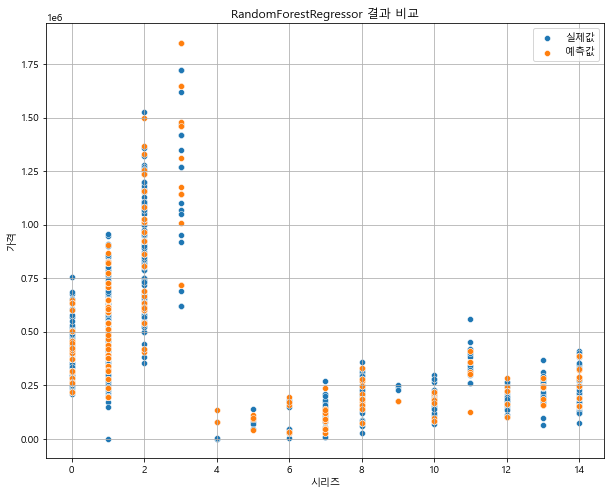

In [237]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='시리즈',y='실제값',data=df)
sns.scatterplot(x='시리즈',y='예측값',data=df)

plt.legend(['실제값','예측값'])
plt.grid()
plt.ylabel('가격')
plt.title('RandomForestRegressor 결과 비교')

## 변수 중요도 

In [242]:
model2.feature_names_in_

array(['시리즈', '모델', '용량', '제품상태'], dtype=object)

In [243]:
model2.feature_importances_

array([0.64647094, 0.26460925, 0.02980495, 0.05911487])

## 피클로 저장

In [244]:
import pickle

In [245]:
with open('RFmodel.pkl','wb') as f:
    pickle.dump(model2, f)

In [247]:
with open('LabelEncoder.pkl','wb') as f:
    pickle.dump(le_list,f)